In [1]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Data for basic scatterplot example

data = {
    'job_skills': ['Python', 'SQL', 'Java', 'C++', 'C#', 'Javascript', 'HTML', 'CSS', 'PHP', 'Ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df_example = pd.DataFrame(data)
df_example

,job_skills,skill_count,skill_pay
0,Python,30,100
1,SQL,25,90
2,Java,20,80
3,C++,15,70
4,C#,10,60
5,Javascript,5,50
6,HTML,4,40
7,CSS,3,30
8,PHP,2,20
9,Ruby,1,10


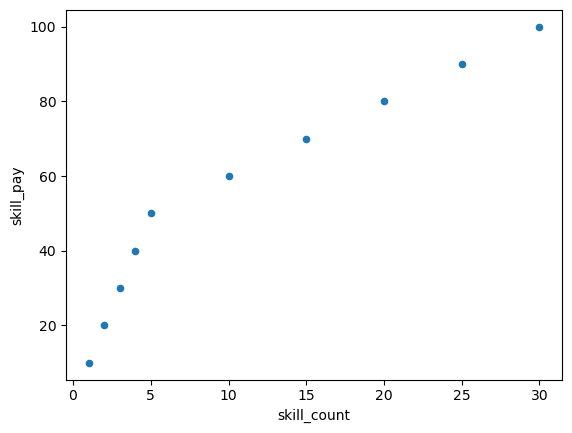

In [3]:
#Create scatterplot

df_example.plot(kind = 'scatter', x = 'skill_count', y = 'skill_pay')
plt.show()

In [4]:
#Scatterplot of median salary vs. skill count for Data Analyst jobs

In [5]:
#Filter for Data Analyst jobs only

df_da = df[df['job_title_short'] == 'Data Analyst']

In [6]:
#Explode the job skills

df_exploded = df_da.explode('job_skills')

In [8]:
#Aggregate the variables

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [9]:
#Filter for the 10 most frequent skills only

skill_stats = skill_stats.sort_values(by = 'skill_count', ascending = False).head(10)

skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


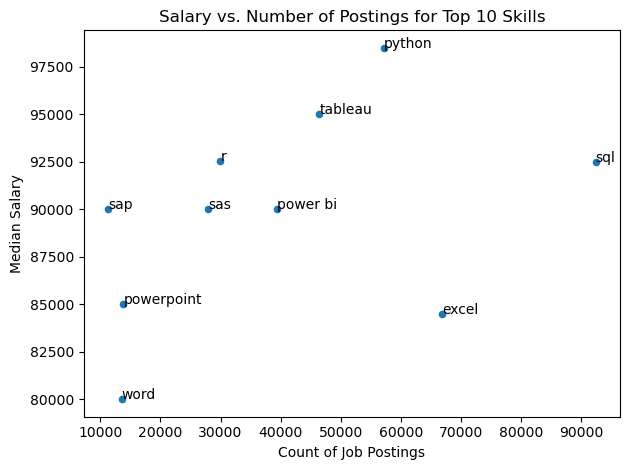

In [14]:
#Plot the data

skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.title('Salary vs. Number of Postings for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')

for i, txt in enumerate(skill_stats.index):                                         #For loop adds job skill labels to the scatterplot points
    plt.text(skill_stats['skill_count'].iloc[i],
            skill_stats['median_salary'].iloc[i],
            txt)

plt.tight_layout()
plt.show()